## 图像阈值

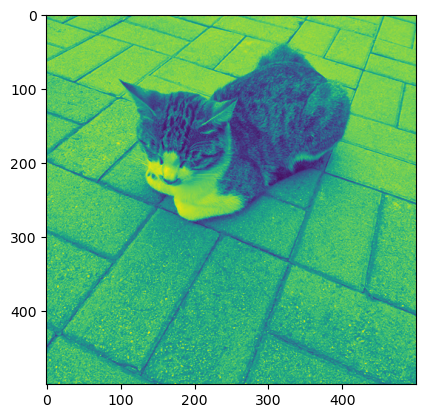

In [22]:
import cv2 #opencv读取格式BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('cat.jpg') #读取图像
img_gray = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.show()

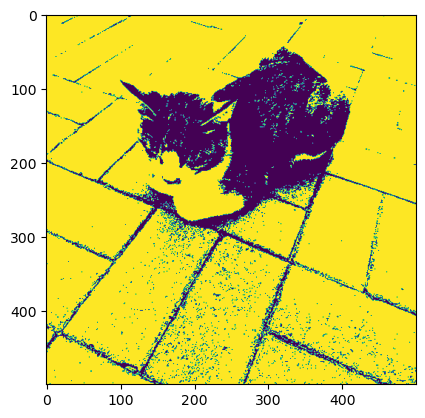

In [23]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC) #大于阈值为阈值
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO) #<=阈值为0
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh1)
plt.show()

## 1-图像平滑

In [13]:
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#均值滤波
# 简单的平均卷积操作

blur = cv2.blur(img, (3, 3))

cv2.imshow('img',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# 方框滤波
# 基本和均值一样可以选择归一化，容易越界

box = cv2.boxFilter(img, -1, (3, 3), normalize = False)

cv2.imshow('img',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2-高斯滤波和中值滤波

In [25]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img, (5, 5), 1)

cv2.imshow('aussian', aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)

cv2.imshow('aussian', median)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img)

[[[192 204 204]
  [192 204 204]
  [185 197 197]
  ...
  [198 211 213]
  [195 208 210]
  [191 204 206]]

 [[184 196 196]
  [189 201 201]
  [182 194 194]
  ...
  [193 206 208]
  [190 203 205]
  [187 200 202]]

 [[191 203 203]
  [204 216 216]
  [193 205 205]
  ...
  [194 207 209]
  [190 203 205]
  [189 202 204]]

 ...

 [[131 139 139]
  [149 157 157]
  [172 180 180]
  ...
  [110 118 118]
  [118 126 126]
  [131 139 139]]

 [[161 169 169]
  [185 193 193]
  [166 174 174]
  ...
  [116 124 124]
  [130 138 138]
  [132 140 140]]

 [[173 181 181]
  [168 176 176]
  [156 164 164]
  ...
  [163 171 171]
  [151 159 159]
  [155 163 163]]]


In [32]:
# 展示所有的
res = np.hstack((blur, aussian, median))
print(median)

cv2.imshow('all', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[192 204 204]
  [191 203 203]
  [189 201 201]
  ...
  [195 208 210]
  [193 206 208]
  [191 204 206]]

 [[191 203 203]
  [188 200 200]
  [185 197 197]
  ...
  [195 208 210]
  [195 208 210]
  [191 204 206]]

 [[184 196 196]
  [184 196 196]
  [184 196 196]
  ...
  [195 208 210]
  [193 206 208]
  [191 204 206]]

 ...

 [[161 169 169]
  [161 169 169]
  [163 171 171]
  ...
  [132 140 140]
  [132 140 140]
  [131 139 139]]

 [[161 169 169]
  [161 169 169]
  [161 169 169]
  ...
  [135 143 143]
  [133 141 141]
  [132 140 140]]

 [[168 176 176]
  [166 174 174]
  [161 169 169]
  ...
  [155 163 163]
  [151 159 159]
  [151 159 159]]]


# 形态学
## 1-腐蚀操作

In [38]:
img= cv2.imread('dige.png')

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 2)

cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
pie = cv2.imread('pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
kernel = np.ones((30, 30), np.uint8)
erosion_1 = cv2.erode(pie, kernel, iterations = 1)
erosion_2 = cv2.erode(pie, kernel, iterations = 2)
erosion_3 = cv2.erode(pie, kernel, iterations = 3)

res = np.hstack((erosion_1, erosion_2, erosion_3))

cv2.imshow('all', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2-膨胀操作

In [48]:
img= cv2.imread('dige.png')

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 2)

cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
kernel = np.ones((3, 3), np.uint8)
dige_dilate = cv2.dilate(erosion, kernel, iterations = 2)

cv2.imshow('erosion',dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
kernel = np.ones((30, 30), np.uint8)
erosion1 = cv2.dilate(erosion_1, kernel, iterations = 1)
erosion2 = cv2.dilate(erosion_2, kernel, iterations = 2)
erosion3 = cv2.dilate(pie, kernel, iterations = 3)

res = np.hstack((erosion1, erosion2, erosion_3))

cv2.imshow('all', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3-开运算与闭运算

In [55]:
# 开：先腐蚀，再膨胀
img= cv2.imread('dige.png')

kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
# 闭：先膨胀，再腐蚀
img= cv2.imread('dige.png')

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CROSS, kernel)

cv2.imshow('closing',closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4-梯度运算

In [57]:
#梯度=膨胀-腐蚀
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 5-礼帽与黑帽
- 礼帽 = 原始输入-开运算结果
- 黑帽 = 闭运算 - 原始结果

In [58]:
# 礼帽
img= cv2.imread('dige.png')

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

cv2.imshow('closing',tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
# 黑帽
img= cv2.imread('dige.png')

tophat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

cv2.imshow('closing',tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()